In [22]:
import pandas as pd

In [23]:
import tensorflow as tf

print(tf.__version__)

2.6.1


In [24]:
kor = [50,70,80,90,100]
eng = [77,88,99,100,70]
math = [170,220,250,280,270]

dat = pd.DataFrame( {"kor":kor, "eng":eng, "math":math } )
dat

,kor,eng,math
0,50,77,170
1,70,88,220
2,80,99,250
3,90,100,280
4,100,70,270


In [25]:
kor = [50,70,80,90,100]
eng = [70,80,90,100,70]
math = [170,220,250,280,270]

dat = pd.DataFrame( {"kor":kor, "eng":eng, "math":math } )
dat

,kor,eng,math
0,50,70,170
1,70,80,220
2,80,90,250
3,90,100,280
4,100,70,270


In [26]:
from sklearn.linear_model import LinearRegression

X = dat[ ['kor', 'eng'] ] 
y = dat[ 'math' ]

model = LinearRegression()
model.fit(X, y)
print("가중치 , y절편 : ",  model.coef_, model.intercept_)

가중치 , y절편 :  [2. 1.] -5.684341886080802e-14


In [27]:
import keras
import tensorflow as tf

In [28]:
import numpy as np

In [29]:
## 스칼라, 0D텐서
x = np.array(12)
print(x)
print(x.ndim)      # 차원수
print(x.shape)     # 행열

## 1D텐서
x = np.array([10,20,30,40,50])
print(x)
print(x.ndim)      # 차원수
print(x.shape)     # 행열

12
0
()
[10 20 30 40 50]
1
(5,)


In [30]:
## 2D텐서
x = np.array([ [10,20,30],
              [11,21,31],
              [12,22,32],
             ])
print(x)
print(x.ndim)      # 차원수
print(x.shape)     # 행열


[[10 20 30]
 [11 21 31]
 [12 22 32]]
2
(3, 3)


In [31]:
x = np.array([
              [ [11,21,31],
               [12,22,32],
               [13,23,33] ],
              [ [11,21,31],
               [12,22,32],
               [13,23,33] ],
              [ [11,21,31],
               [12,22,32],
               [13,23,33] ]
             ])
print(x.ndim)
print(x.shape)
x

3
(3, 3, 3)


array([[[11, 21, 31],
        [12, 22, 32],
        [13, 23, 33]],

       [[11, 21, 31],
        [12, 22, 32],
        [13, 23, 33]],

       [[11, 21, 31],
        [12, 22, 32],
        [13, 23, 33]]])

In [32]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [33]:
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


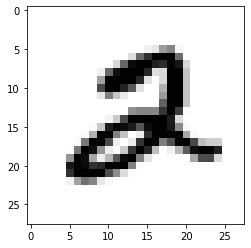

In [34]:
import matplotlib.pyplot as plt

image = train_images[5]
plt.imshow(image, cmap=plt.cm.binary)
plt.show()

In [35]:
my_slice = train_images[:, 14:, 14:]
print(my_slice.shape)

(60000, 14, 14)


In [36]:
train_images.shape

(60000, 28, 28)

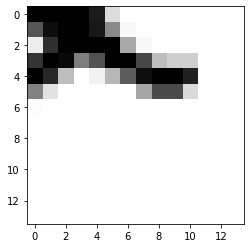

In [37]:
image = my_slice[5]
plt.imshow(image, cmap=plt.cm.binary)
plt.show()

### 딥러닝 구현하기

### 자전거 데이터 가져오기

In [38]:
import tensorflow as rf
import keras

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [39]:
## train 데이터 셋 , test 데이터 셋
## train 은 학습을 위한 입력 데이터 셋
## test 은 예측을 위한 새로운 데이터 셋(평가)
## parse_dates : datetime 컬럼을 시간형으로 불러올 수 있음
train = pd.read_csv("./data/bike_mod_tr.csv", parse_dates=['datetime'])
test = pd.read_csv("./data/bike_mod_tr.csv", parse_dates=['datetime'])

In [40]:
sel = ['hour', 'temp']

X = train[sel]
y = train['count']

X_val = test[sel]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state=0)

### 딥러닝 모델 만들기

In [43]:
#tensorflow, pytorch, keras()
from keras.models import Sequential
from keras.layers import Dense

In [44]:
# bikesharing 회귀 모델 1개
model = Sequential()
model.add( Dense(16, input_dim=2, activation='relu') )
model.add(Dense(1))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [46]:
### 모델의 사용하는 지표 등 기준 설정
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
817/817 [==============================] - 1s 971us/step - loss: 51027.1172
Epoch 2/50
817/817 [==============================] - 1s 1ms/step - loss: 25549.4785
Epoch 3/50
817/817 [==============================] - 1s 1ms/step - loss: 24466.4727
Epoch 4/50
817/817 [==============================] - 1s 989us/step - loss: 23955.1250
Epoch 5/50
817/817 [==============================] - 1s 986us/step - loss: 23403.9434
Epoch 6/50
817/817 [==============================] - 1s 980us/step - loss: 22851.7910
Epoch 7/50
817/817 [==============================] - 1s 1ms/step - loss: 22308.8750
Epoch 8/50
817/817 [==============================] - 1s 1ms/step - loss: 21784.7031
Epoch 9/50
817/817 [==============================] - 1s 1ms/step - loss: 21306.3516
Epoch 10/50
817/817 [==============================] - 1s 1ms/step - loss: 20880.8496
Epoch 11/50
817/817 [==============================] - 1s 1ms/step - loss: 20541.8594
Epoch 12/50
817/817 [==============================] - 

### 모델 개선

* 1. 변수 추가. 성능 개선 확인
* 2. 은닉층 추가
* 3. 노드수를 늘릭

In [47]:
## model.score()
model.evaluate(X_test, y_test)

86/86 [==============================] - 0s 892us/step - loss: 19070.6855


19070.685546875

In [48]:
## 예측하기
pred = model.predict(X_val)
pred[0:10]

array([[-15.66916 ],
       [  8.940547],
       [ 33.861786],
       [ 59.094517],
       [ 84.01574 ],
       [108.93697 ],
       [134.46577 ],
       [129.05367 ],
       [146.91582 ],
       [190.29347 ]], dtype=float32)

# 변수 추가

In [49]:
sel = ['hour', 'temp', 'year', 'dayofweek', 'month', 'humidity', 'weather', 'season']

X = train[sel]
y = train['count']

X_val = test[sel]

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test

(       hour   temp
 10639    17  14.76
 2666      0  28.70
 7474     19  22.14
 5094      8  18.86
 1714      8  15.58
 ...     ...    ...
 4859     13  22.14
 3264     22  28.70
 9845     14  27.06
 10799     9  14.76
 2732     18  33.62
 
 [8164 rows x 2 columns],
       hour   temp
 6638    21  23.78
 7975    16  27.06
 5915    16  18.86
 8050    19  28.70
 5894    19  22.14
 ...    ...    ...
 6111    21  13.12
 1917    19  22.14
 5702    18  18.04
 4813    15  20.50
 5125    15  17.22
 
 [2722 rows x 2 columns],
 10639    229
 2666      89
 7474     553
 5094     414
 1714      43
         ... 
 4859     153
 3264     188
 9845     617
 10799    132
 2732     383
 Name: count, Length: 8164, dtype: int64,
 6638    244
 7975    239
 5915    229
 8050    467
 5894    335
        ... 
 6111    122
 1917    292
 5702    421
 4813    310
 5125     30
 Name: count, Length: 2722, dtype: int64)

# 은닉층 추가